In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [203]:
df=pd.read_csv("diabetes - diabetes.csv")

In [204]:
df.shape

(768, 9)

In [205]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [207]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [208]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [209]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [210]:
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Split the dataset into features and target column

In [211]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [212]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

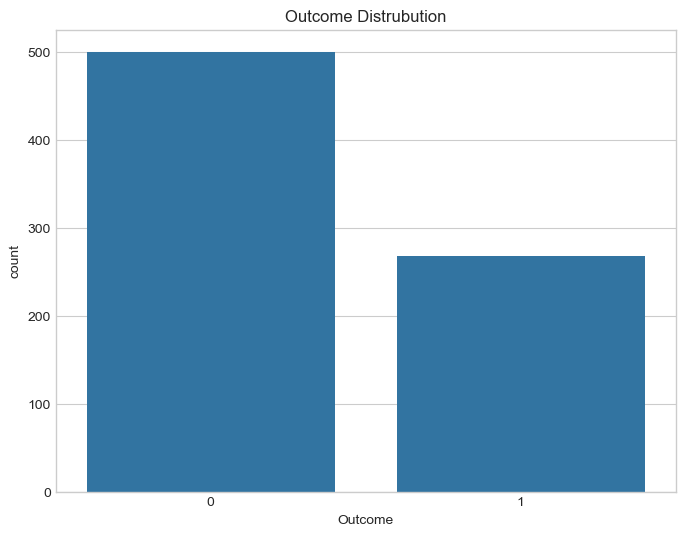

In [213]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome Distrubution')
plt.show()

In [214]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


# Scaling the input feature data

In [215]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [216]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Split into train dataset and test dataset

In [217]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [218]:
x_train.shape,y_train.shape

((614, 8), (614,))

In [219]:
x_test.shape,y_test.shape

((154, 8), (154,))

# Applyng the Random Forest Classifier algorithm

In [220]:
# applyng the Random Forest Classifier algorithm
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

# Applyng the Decision Tree Classifier algorithm

In [221]:
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10,max_depth=5)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10)

# Applyng the Naive Bayes Classifier algorithm

In [222]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

# Applyng the KNN classifier algorithm

In [223]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10,metric='euclidean')
knn_model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

# Applyng the Logistic regression Classifier algorithm

In [224]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

# Applyng the SVM Classifier algorithm

In [225]:
from sklearn.svm import SVC
svm_model= SVC(kernel='rbf', C=1000.0, gamma='scale', random_state=42)
svm_model.fit(x_train,y_train)

SVC(C=1000.0, random_state=42)

# Model prediction

In [226]:
rf_pred = rf_model.predict(x_test)
dt_pred = dt_model.predict(x_test)
nb_pred = nb_model.predict(x_test) 
knn_pred = knn_model.predict(x_test)  
lr_pred = lr_model.predict(x_test)
svm_pred=svm_model.predict(x_test)
rf_pred
dt_pred
nb_pred
knn_pred
lr_pred
svm_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [227]:
rf_pred[:5]
dt_pred[:5]
nb_pred[:5]
knn_pred[:5]
lr_pred[:5]
svm_pred[:5]

array([0, 0, 0, 0, 0])

In [228]:
y_test[:5]

668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

# Model evaluation

In [229]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_accuracy = accuracy_score(y_test,rf_model.predict(x_test)) *100
dt_accuracy = accuracy_score(y_test,dt_model.predict(x_test)) *100
nb_accuracy = accuracy_score(y_test, nb_model.predict(x_test)) * 100
knn_accuracy = accuracy_score(y_test, knn_model.predict(x_test)) * 100
lr_accuracy = accuracy_score(y_test, lr_model.predict(x_test)) * 100
svm_accuracy = accuracy_score(y_test, svm_model.predict(x_test)) * 100

print(f"RF Accuracy: {rf_accuracy:.2f}%")
print(f"DT Accuracy: {dt_accuracy:.2f}%")
print(f"NB Accuracy: {nb_accuracy:.2f}%")
print(f"KNN Accuracy: {knn_accuracy:.2f}%")
print(f"LR Accuracy: {lr_accuracy:.2f}%")
print(f"SVM Accuracy: {svm_accuracy:.2f}%")

RF Accuracy: 73.38%
DT Accuracy: 70.13%
NB Accuracy: 76.62%
KNN Accuracy: 76.62%
LR Accuracy: 74.68%
SVM Accuracy: 70.78%


# Feature Importance

In [230]:
importances = pd.Series(rf_model.feature_importances_, index=x.columns)
top_features = importances.sort_values(ascending=False).head(10)
print("\nTop 10 Important Features:\n", top_features)


Top 10 Important Features:
 Glucose                     0.254374
BMI                         0.168841
Age                         0.146095
DiabetesPedigreeFunction    0.120417
BloodPressure               0.088537
Insulin                     0.078229
Pregnancies                 0.078026
SkinThickness               0.065481
dtype: float64


In [231]:
x_top = x[top_features.index]

In [232]:
#Train New Model with Reduced Features
x_train_top, x_test_top, y_train_top, y_test_top = train_test_split(x_top, y, test_size=0.2, random_state=42)
rf_top = RandomForestClassifier(random_state=42)
rf_top.fit(x_train_top, y_train_top)

RandomForestClassifier(random_state=42)

In [233]:
# Evaluate Reduced Model
y_pred_top = rf_top.predict(x_test_top)
rf_top_accuracy = accuracy_score(y_test_top, y_pred_top) * 100

print(f"\nReduced Model Accuracy (Top 5 Features): {rf_top_accuracy:.2f}%")
print("\nClassification Report (Reduced Model):\n", classification_report(y_test_top, y_pred_top))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_top, y_pred_top))


Reduced Model Accuracy (Top 5 Features): 75.97%

Classification Report (Reduced Model):
               precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154


Confusion Matrix:
 [[82 17]
 [20 35]]


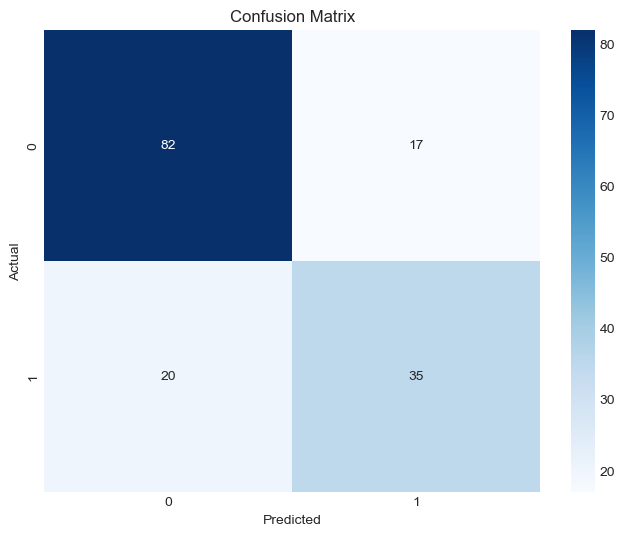

In [234]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_top, y_pred_top), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Applying Adaboost Classifier

In [235]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(x_train, y_train)

AdaBoostClassifier()

In [236]:
#model evaluation
from sklearn.metrics import accuracy_score
ada_accuracy = accuracy_score(y_test,ada_model.predict(x_test)) *100

print(f"ADA boost Accuracy: {ada_accuracy:.2f}%")

ADA boost Accuracy: 77.92%


# Applying voting classifier

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# Create individual models
model1 = LogisticRegression(max_iter=1000)
model2 = KNeighborsClassifier(n_neighbors=5)
model3 = DecisionTreeClassifier(random_state=42)

# Combine models into a voting classifier
voting_model = VotingClassifier(
    estimators=[
        ('lr', model1),
        ('knn', model2),
        ('dt', model3)
    ],
    voting='soft'
)
voting_model.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 voting='soft')

In [238]:
#model evaluation
from sklearn.metrics import accuracy_score
voting_accuracy = accuracy_score(y_test,voting_model.predict(x_test)) *100

print(f"Voting Accuracy: {voting_accuracy:.2f}%")

Voting Accuracy: 76.62%


# Applying stacking classifier

In [239]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

# Base models (level-0)
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Meta model (level-1)
meta_model = LogisticRegression(max_iter=1000)

# Create stacking classifier
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train stacking model
stack_model.fit(x_train, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier(random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [240]:
#model evaluation
from sklearn.metrics import accuracy_score
stacking_accuracy = accuracy_score(y_test,stack_model.predict(x_test)) *100

print(f"Stacking Accuracy: {stacking_accuracy:.2f}%")

Stacking Accuracy: 73.38%


# Comparing All Classification Models And Ensemble Learning Models Accuracies

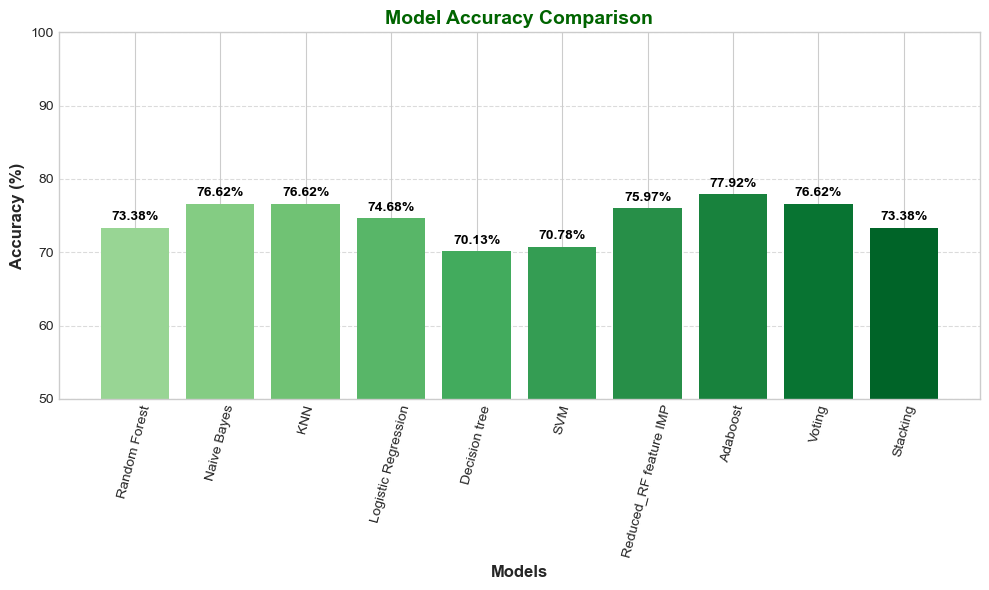

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Random Forest','Naive Bayes', 'KNN', 'Logistic Regression',
           'Decision tree','SVM','Reduced_RF feature IMP','Adaboost','Voting','Stacking']
accuracies = [rf_accuracy, nb_accuracy, knn_accuracy, lr_accuracy,
              dt_accuracy,svm_accuracy, rf_top_accuracy, ada_accuracy, voting_accuracy, stacking_accuracy]

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color=plt.cm.Greens(np.linspace(0.4, 0.9, len(models))))

# Labels and title
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold', color='darkgreen')
plt.xticks(rotation=35)

# Show accuracy values on bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontsize=10, fontweight='bold', color='black')

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=75)
plt.ylim(50, 100)
plt.tight_layout()
plt.show()


# Using grid search CV for logistic regression

In [242]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(max_iter=1000)

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [243]:
# Fit on training data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='accuracy', verbose=2)

In [244]:
# Best Parameters and Score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.7687591630014661


In [245]:
lr=LogisticRegression(C=0.01, penalty='l2')
lr.fit(x_train,y_train)

LogisticRegression(C=0.01)

In [246]:
y_pred=lr.predict(x_test)
Logistic_accuracy = accuracy_score(y_test,y_pred) * 100
print(f"LR Accuracy: {Logistic_accuracy:.2f}%")

LR Accuracy: 72.73%


# Using grid search cv for decision tree

In [247]:
from sklearn.model_selection import GridSearchCV

# Define the model
dt = DecisionTreeClassifier(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, 12, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search= GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [248]:
# Fit Grid Search
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9, 12, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [249]:
# Best Parameters and Score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 15, 'splitter': 'random'}
Best Cross-Validation Accuracy: 0.7606690657070506


In [250]:
DT=DecisionTreeClassifier(criterion='gini',max_depth=None,max_features=None,min_samples_leaf=1,min_samples_split=15,splitter='random')
DT.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=15, splitter='random')

In [251]:
y_pred=DT.predict(x_test)
Decision_accuracy = accuracy_score(y_test,y_pred) * 100
print(f"DT Accuracy: {Decision_accuracy:.2f}%")

DT Accuracy: 75.32%


# Using grid search cv for KNN

In [252]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
# Define parameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],  
    'weights': ['uniform', 'distance'],       
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

# Initialize GridSearchCV
grid_search= GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [253]:
# Fit Grid Search
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15, 21], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [254]:
# Best Parameters and Score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 21, 'p': 1, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.7524990003998401


In [255]:
knn=KNeighborsClassifier(metric='manhattan',n_neighbors=21,p=1,weights='distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=21, p=1,
                     weights='distance')

In [256]:
y_pred=knn.predict(x_test)
Knearest_accuracy = accuracy_score(y_test,y_pred) * 100
print(f"knn Accuracy: {Knearest_accuracy:.2f}%")

knn Accuracy: 75.32%


# Using grid search cv for RANDOM FOREST

In [257]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search= GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [258]:
# Fit Grid Search
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [259]:
# Best Parameters and Score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.7768892443022791


In [260]:
RF=RandomForestClassifier(bootstrap=True,criterion='gini',max_features='sqrt',n_estimators=200)
RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [261]:
y_pred=RF.predict(x_test)
Random_accuracy = accuracy_score(y_test,y_pred) * 100
print(f"RF Accuracy: {Random_accuracy:.2f}%")

RF Accuracy: 74.03%


# Using grade search cv for svm

In [262]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Initialize the model
svm = SVC(probability=True, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear','rbf'],
    'gamma': ['scale']
    
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)


In [263]:
# Fit Grid Search
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=2)

In [264]:
# Best Parameters and Score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.767119818739171


In [265]:
svm = SVC(C=0.1,gamma='scale',kernel='linear')
svm.fit(x_train,y_train)

SVC(C=0.1, kernel='linear')

In [266]:
y_pred=svm.predict(x_test)
Support_accuracy = accuracy_score(y_test,y_pred) * 100
print(f"SVM Accuracy: {Support_accuracy:.2f}%")

SVM Accuracy: 75.32%


# Using grade search cv for Naive bayes

In [267]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Create model
nb = GaussianNB()

# Define parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=nb,
                           param_grid=param_grid,
                           cv=5,               
                           scoring='accuracy', 
                           n_jobs=-1,         
                           verbose=2)


In [268]:
# Fit Grid Search
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001]},
             scoring='accuracy', verbose=2)

In [269]:
# Best Parameters and Score
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'var_smoothing': 1e-09}
Best Cross-Validation Accuracy: 0.752472344395575


In [270]:
naive = GaussianNB(var_smoothing=1e-09)
naive.fit(x_train,y_train)

GaussianNB()

In [271]:
y_pred=naive.predict(x_test)
Naive_accuracy = accuracy_score(y_test,y_pred) * 100
print(f"NAIVEBAYES Accuracy: {Naive_accuracy:.2f}%")

NAIVEBAYES Accuracy: 76.62%


# Comparing All Classification Models After Applying Grade search CV

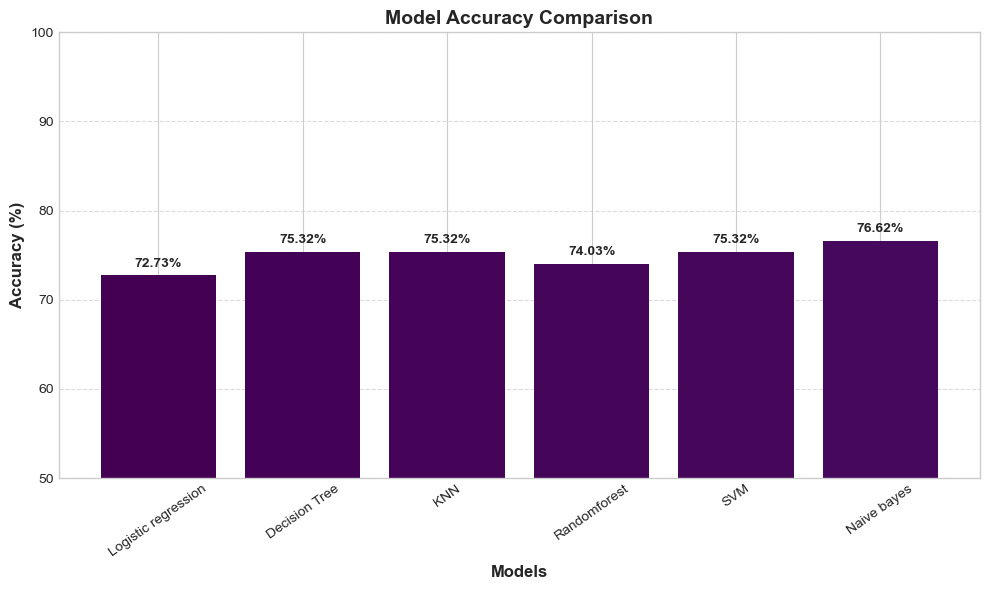

In [272]:
import matplotlib.pyplot as plt

# Data
models = ['Logistic regression','Decision Tree','KNN', 'Randomforest', 'SVM',
           'Naive bayes']
accuracies = [Logistic_accuracy,Decision_accuracy,Knearest_accuracy,Random_accuracy,Support_accuracy,Naive_accuracy]

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color=plt.cm.viridis(range(len(models))))  # nice gradient colors

# Labels and title
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xticks(rotation=35)

# Show accuracy values on bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontsize=10, fontweight='bold')

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(50, 100)
plt.tight_layout()
plt.show()
